In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.rc('font', size=14)

import seaborn as sns
sns.set(style='white') #white background style for seaborn plots
sns.set(style='whitegrid', color_codes=True)

In [2]:
# get titanic & test csv files as a DataFrame (df)

titanic_df = pd.read_csv("../input/titanic/train.csv")

#cross validation data (hold-out testing)
test_df = pd.read_csv("../input/titanic/test.csv")


titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#set passengerid to be the index col
titanic_df.set_index(['PassengerId'], inplace=True)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2.Data Quality and Missing Values**

In [4]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### **2.1 Age: Missing values**

In [5]:
print('Portion of missing age = ', round((177/titanic_df.shape[0])*100), '%')

Portion of missing age =  20 %


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


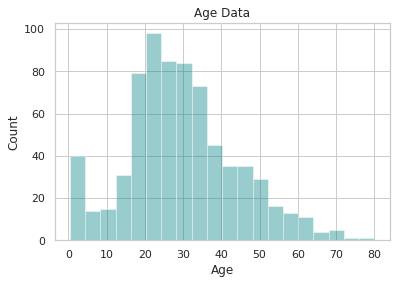

In [6]:
ax = sns.distplot(titanic_df['Age'], kde=False, color='teal')
ax.set(ylabel='Count', xlabel='Age', title='Age Data')
plt.show()

In [7]:
#as Age is right skewed , impute it with median
titanic_df['Age'].median()

28.0

28 year is the median of Age

### **2.2 Cabin: Missing values**

In [8]:
print('Cabin portion of missing data', round((687/titanic_df.shape[0])*100), '%')
#drop it

Cabin portion of missing data 77 %


### **2.3 Embarked: Missing values**

In [9]:
print('Embarked portion of missing values ', (2/titanic_df.shape[0])*100, '%')
#0.2% , impute ==> Note it's Categorical Data

Embarked portion of missing values  0.22446689113355783 %


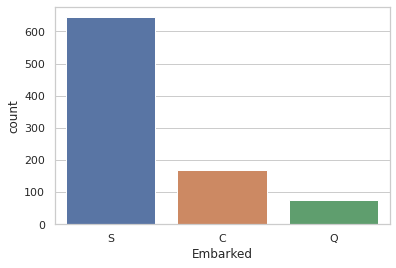

In [10]:
ax = sns.countplot(x= titanic_df['Embarked'])
#so we should impute missing data in embarked with 'S'

### **2.4 Final Adjustments to Data (Train & Test)** 

In [11]:
train_data = titanic_df
train_data['Age'].fillna(28, inplace=True)
train_data['Embarked'].fillna('S', inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

#### **2.4.1 Final Adjustments to Data (Train & Test)** 

both SibSp and Parch relate to traveling with family.
we can combine them together in one variable (feature)

In [12]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
train_data['TravelAlone'] = np.where(train_data['Family']>0, 0,1)

In [13]:
#drop the combined columns
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('Family', axis=1, inplace=True)

In [14]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


**Convert all the data to categorical data with 0,1 using pd.get_dummies()**

In [15]:
train1 = pd.get_dummies(train_data, columns=['Pclass'])
train2 = pd.get_dummies(train1, columns=['Sex'])
train3 = pd.get_dummies(train2, columns=['Embarked'])
#drop female col, as if male col = 1 then male, else (0) then female
train3.drop('Sex_female', axis=1, inplace=True)
train3.head()

,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,0,1
5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,1,0,0,1


**As Name and Ticket are useless info here in this prediction, we are going to drop them
(don't forget that we made PassengerId as our index, it won't be considered in the process**

In [16]:
train3.drop('Name', axis=1, inplace=True)
train3.drop('Ticket', axis=1, inplace=True)

In [17]:
final_train = train3
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,22.0,7.2500,0,0,0,1,1,0,0,1
2,1,38.0,71.2833,0,1,0,0,0,1,0,0
3,1,26.0,7.9250,1,0,0,1,0,0,0,1
4,1,35.0,53.1000,0,1,0,0,0,0,0,1
5,0,35.0,8.0500,1,0,0,1,1,0,0,1


### Now, apply the same changes to the test data.
#### impute by the same values that you have calculated in Training Set, but before doing so, check the test data to see whether it contains any other missing data or not

In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
test_df['Age'].fillna(28, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


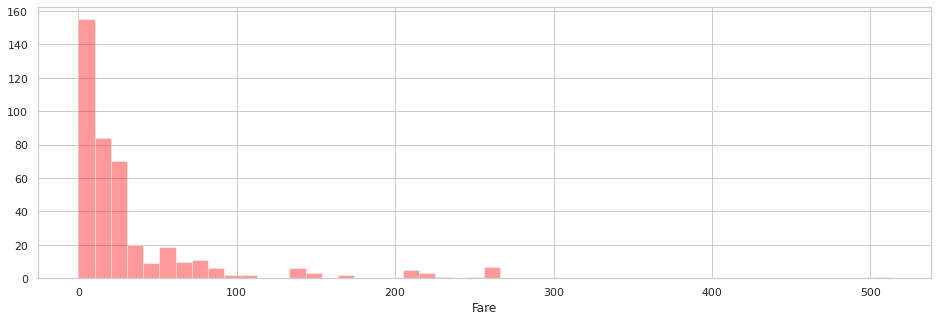

In [20]:
plt.figure(figsize=(16,5))
ax = sns.distplot(test_df['Fare'], kde=False, color='red')
plt.show()
#as fare is right skewed, then we are going to impute with the median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [21]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Do the same as Training Set

In [22]:
test_df['Family']= test_df["SibSp"] + test_df["Parch"]
test_df['TravelAlone']= np.where(test_df['Family'] > 0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('Family', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

final_test.set_index(['PassengerId'], inplace=True)

In [23]:
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,
892,34.5,7.8292,1,0,0,1,0,1,0,1
893,47.0,7.0000,0,0,0,1,0,0,1,0
894,62.0,9.6875,1,0,1,0,0,1,0,1
895,27.0,8.6625,1,0,0,1,0,0,1,1
896,22.0,12.2875,0,0,0,1,0,0,1,0


# 3. Exploratory Data Analysis 

## 3.1 Exploration of Age

Text(0.5, 1.0, 'Density Plot of Age for Surviving Population and Deceased Population')

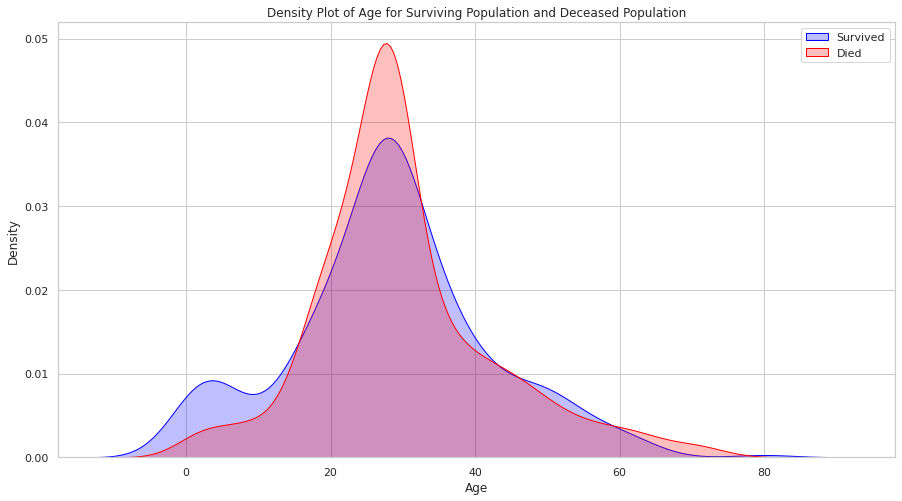

In [24]:
plt.figure(figsize=(15,8))
sns.kdeplot(final_train['Age'][final_train['Survived'] == 1], color='blue', shade=True)
sns.kdeplot(final_train['Age'][final_train['Survived'] == 0], color='red', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')

**The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.**

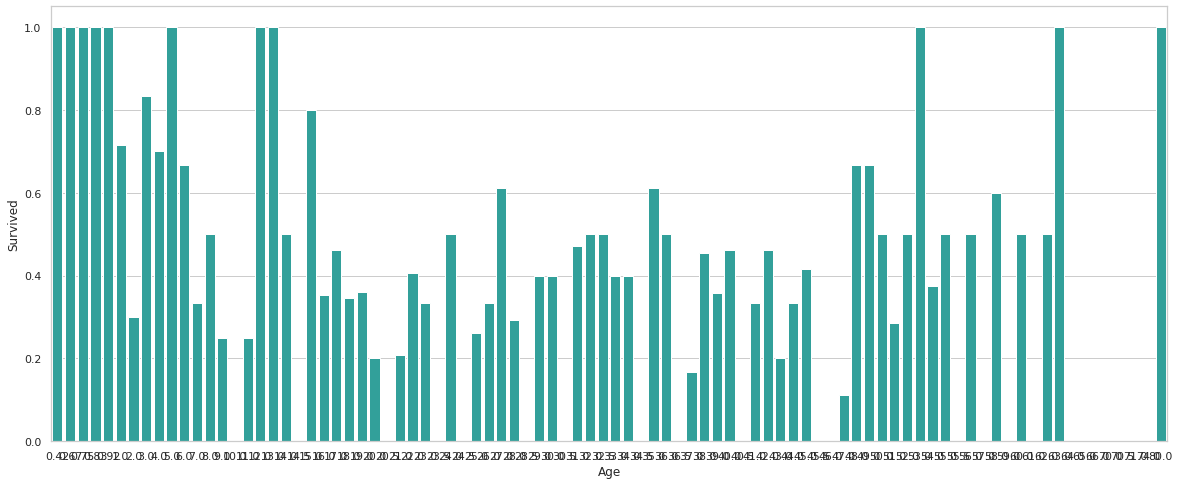

In [25]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(final_train['Age']).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [26]:
final_train['IsMinor']= np.where(train_data['Age'] <= 16, 1, 0)
final_test['IsMinor']= np.where(test_df['Age'] <= 16, 1, 0)

## 3.2 Exploration of Fare

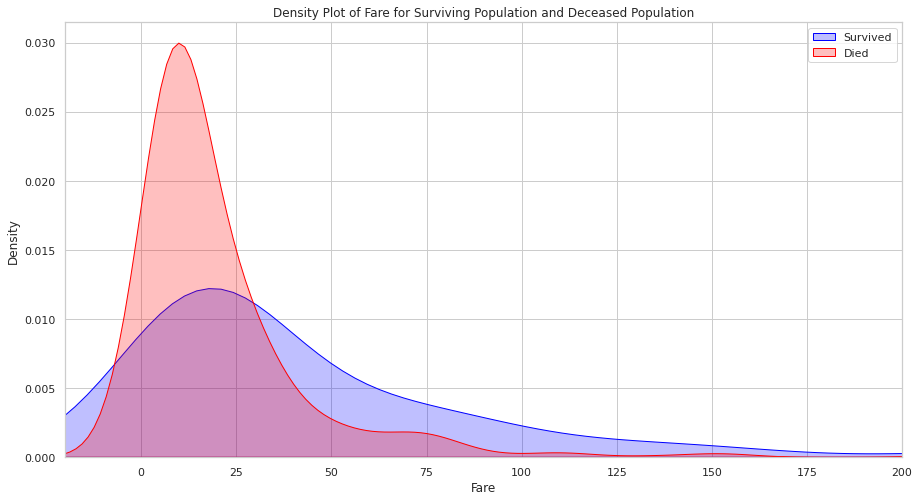

In [27]:
plt.figure(figsize=(15,8))
sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="blue", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

## 3.3 Exploration of Passenger Class

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


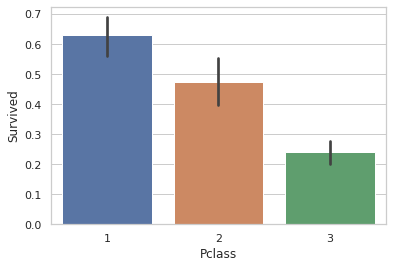

In [28]:
sns.barplot('Pclass', 'Survived', data=titanic_df)
plt.show()

Unsurprisingly, being a first class passenger was safest.

## 3.4 Exploration of Embarked Port

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


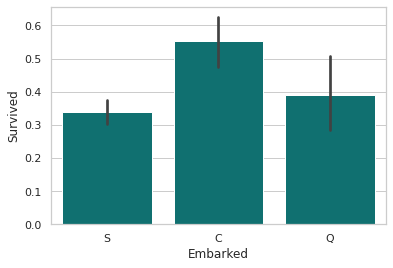

In [29]:
sns.barplot('Embarked', 'Survived', data=titanic_df, color="teal")
plt.show()

assengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).

## 3.5 Exploration of Traveling Alone vs. With Family

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


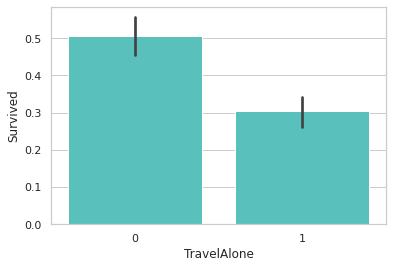

In [30]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

## 3.6 Exploration of Gender Variable

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


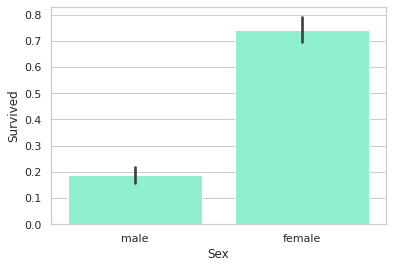

In [31]:
sns.barplot('Sex', 'Survived', data=titanic_df, color="aquamarine")
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

# 4. The Model
### Preparing the data

In [32]:
final_train.head(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsMinor
PassengerId,,,,,,,,,,,,
1,0,22.0,7.2500,0,0,0,1,1,0,0,1,0
2,1,38.0,71.2833,0,1,0,0,0,1,0,0,0
3,1,26.0,7.9250,1,0,0,1,0,0,0,1,0
4,1,35.0,53.1000,0,1,0,0,0,0,0,1,0
5,0,35.0,8.0500,1,0,0,1,1,0,0,1,0
6,0,28.0,8.4583,1,0,0,1,1,0,1,0,0
7,0,54.0,51.8625,1,1,0,0,1,0,0,1,0
8,0,2.0,21.0750,0,0,0,1,1,0,0,1,1
9,1,27.0,11.1333,0,0,0,1,0,0,0,1,0


In [33]:
features = ["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male", "Pclass_3", "Embarked_Q", "TravelAlone", "Fare", "IsMinor"]

X = final_train[features]
y = final_train['Survived']
Xtest = final_test[features]


## 4.1 Model Evaluation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train, val = train_test_split(final_train, test_size=0.2, random_state=1)

Xtrain = train[features]
ytrain = train['Survived']
Xval = val[features]
yval = val['Survived']
model = LogisticRegression(solver='liblinear')
model.fit(Xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [35]:
#prediction
pred_val = model.predict(Xval)
# print(pred_val)

In [36]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(pred_val, yval)
print(val_mae)

0.22905027932960895


## 4.1.1 Another Metric

In [37]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

cv_scores = cross_val_score(model, X, y, 
                            cv=5,
                            scoring='accuracy')
print(cv_scores)

print("Average MAE score (across experiments):", scores.mean())
print("Average Accuracy score (across experiments):", cv_scores.mean())

MAE scores:
 [0.23463687 0.17977528 0.20786517 0.2247191  0.16853933]
[0.76536313 0.82022472 0.79213483 0.7752809  0.83146067]
Average MAE score (across experiments): 0.20310714958257486
Average Accuracy score (across experiments): 0.7968928504174253


#### I think this output MAE is good, now let's build our model, and test using test data
# Let's Apply our final Model

In [38]:
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
predictions = model.predict(Xtest)
output = pd.DataFrame({"PassengerId": final_test.index,
                      "Survived": predictions})

output.head()
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
